In [ ]:
!pip install kaggle 

In [1]:
from kaggle.api.kaggle_api_extended import KaggleApi

from zipfile import ZipFile
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import os
from pprint import pprint


# Download the Datasets

### Airbnb Listing Dataset

In [2]:
api = KaggleApi()
api.authenticate()

In [3]:
# Download dataset from Kaggle
api.dataset_download_files('dgomonov/new-york-city-airbnb-open-data', unzip=True)

In [4]:
airbnb_data = pd.read_csv('AB_NYC_2019.csv')

In [5]:
airbnb_data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [6]:
airbnb_data.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [7]:
nyc_neighbourhood = airbnb_data['neighbourhood_group'].unique()

### Crime Rate Dataset
- Downloaded from `_____URL_____` 

In [8]:
crime_data = pd.read_csv('NYC_ARREST_DATA.csv')

In [9]:
crime_data.head()

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lon_Lat
0,10837169,04/02/2006,NaN,NaN,NaN,NaN,NaN,NaN,Q,101,0.0,NaN,M,BLACK,1051775.0,159727.0,40.604841,-73.756823,POINT (-73.75682250899997 40.604840985000074)
1,189797412,11/09/2018,475.0,NaN,NaN,NaN,PL 1651601,M,M,28,1.0,25-44,F,WHITE HISPANIC,997374.0,234664.0,40.810773,-73.952592,POINT (-73.95259158999993 40.81077276700007)
2,189992103,11/14/2018,475.0,NaN,NaN,NaN,PL 1651601,M,K,75,1.0,18-24,M,BLACK,1021568.0,185710.0,40.676337,-73.865464,POINT (-73.86546353999995 40.676337363000066)
3,189714430,11/07/2018,117.0,RECKLESS ENDANGERMENT 1,126.0,MISCELLANEOUS PENAL LAW,PL 1202500,F,M,26,0.0,45-64,M,WHITE,993685.0,233346.0,40.807160,-73.965920,POINT (-73.96591978699998 40.80715993100006)
4,190067816,11/15/2018,586.0,NaN,NaN,NaN,PL 230341A,F,M,5,0.0,18-24,M,BLACK,984946.0,200203.0,40.716196,-73.997491,POINT (-73.99749074599998 40.716195914000025)


In [10]:
crime_data.columns

Index(['ARREST_KEY', 'ARREST_DATE', 'PD_CD', 'PD_DESC', 'KY_CD', 'OFNS_DESC',
       'LAW_CODE', 'LAW_CAT_CD', 'ARREST_BORO', 'ARREST_PRECINCT',
       'JURISDICTION_CODE', 'AGE_GROUP', 'PERP_SEX', 'PERP_RACE', 'X_COORD_CD',
       'Y_COORD_CD', 'Latitude', 'Longitude', 'Lon_Lat'],
      dtype='object')

In [11]:
# Explore the columns in DF and what values are unique
for col in crime_data.columns:
    print(col)
    print(crime_data[col].unique())
    print()

ARREST_KEY
[ 10837169 189797412 189992103 ... 205307020 206301725 206235317]

ARREST_DATE
['04/02/2006' '11/09/2018' '11/14/2018' ... '12/08/2019' '12/01/2019'
 '12/24/2019']

PD_CD
[ nan 475. 117. 586. 109. 177. 440. 665. 175. 105. 164. 101. 153. 263.
 155. 157. 113. 739. 681. 168. 594. 179. 729. 742. 397. 968. 176. 478.
 707. 339. 515. 143. 261. 513. 203. 793. 567. 464. 244. 439. 566. 782.
 223. 569. 727. 511. 808. 544. 792. 521. 703. 205. 809. 943. 273. 197.
 779. 198. 750. 106. 548. 181. 523. 760. 879. 705. 764. 725. 166. 170.
 115. 503. 209. 441. 293. 905. 419. 847. 672.  49. 922. 918. 114. 563.
 939. 963. 570.   0. 639. 379. 972. 969. 508. 201. 409. 291. 204. 961.
 510. 139. 466. 514. 591. 762. 775. 612. 557.  29. 568. 199. 502. 507.
 906. 904. 530. 520. 780. 596. 909. 652. 638. 553. 637. 803. 899. 644.
 500. 849. 693. 614. 533. 748. 802. 874. 269. 259. 744. 461. 258. 494.
 462. 505. 490. 565. 916. 661. 625. 687. 715. 759. 493. 640.  16. 643.
 512. 501. 889. 265. 649. 733. 112. 2

***

# Clean Data

## Dropping Values/Columns
Drop columns that contain duplicated or useless information. 

In [12]:
crime_data_01 = crime_data[['ARREST_DATE','ARREST_BORO','LAW_CAT_CD', 'JURISDICTION_CODE','OFNS_DESC','PD_DESC']]

In [13]:
crime_data_01.columns

Index(['ARREST_DATE', 'ARREST_BORO', 'LAW_CAT_CD', 'JURISDICTION_CODE',
       'OFNS_DESC', 'PD_DESC'],
      dtype='object')

In [14]:
crime_data_01['LAW_CAT_CD'].unique()

array([nan, 'M', 'F', 'I', 'V'], dtype=object)

In [15]:
crime_data_01['ARREST_DATE'] = pd.to_datetime(crime_data_01['ARREST_DATE']).dt.year

/Users/huiqiantan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [16]:
crime_data_01.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5012956 entries, 0 to 5012955
Data columns (total 6 columns):
 #   Column             Dtype  
---  ------             -----  
 0   ARREST_DATE        int64  
 1   ARREST_BORO        object 
 2   LAW_CAT_CD         object 
 3   JURISDICTION_CODE  float64
 4   OFNS_DESC          object 
 5   PD_DESC            object 
dtypes: float64(1), int64(1), object(4)
memory usage: 229.5+ MB


In [17]:
crime_data_01.head()

,ARREST_DATE,ARREST_BORO,LAW_CAT_CD,JURISDICTION_CODE,OFNS_DESC,PD_DESC
0,2006,Q,NaN,0.0,NaN,NaN
1,2018,M,M,1.0,NaN,NaN
2,2018,K,M,1.0,NaN,NaN
3,2018,M,F,0.0,MISCELLANEOUS PENAL LAW,RECKLESS ENDANGERMENT 1
4,2018,M,F,0.0,NaN,NaN


In [18]:
crime_data_01.tail(5)

,ARREST_DATE,ARREST_BORO,LAW_CAT_CD,JURISDICTION_CODE,OFNS_DESC,PD_DESC
5012951,2019,K,M,0.0,OTHER OFFENSES RELATED TO THEF,"THEFT OF SERVICES, UNCLASSIFIE"
5012952,2019,Q,M,4.0,VEHICLE AND TRAFFIC LAWS,"TRAFFIC,UNCLASSIFIED MISDEMEAN"
5012953,2019,S,F,0.0,VEHICLE AND TRAFFIC LAWS,"TRAFFIC,UNCLASSIFIED MISDEMEAN"
5012954,2019,Q,F,0.0,MISCELLANEOUS PENAL LAW,"PUBLIC ADMINISTRATION,UNCLASSI"
5012955,2019,M,F,0.0,FELONY ASSAULT,"ASSAULT 2,1,UNCLASSIFIED"


In [19]:
print(crime_data_01.isna().sum())
# crime_data_01[crime_data_01.isna().any(axis=1)]

ARREST_DATE              0
ARREST_BORO              8
LAW_CAT_CD           17472
JURISDICTION_CODE       10
OFNS_DESC             9029
PD_DESC               9029
dtype: int64


In [20]:
crime_data_01.shape

(5012956, 6)

# Fill NANS

As we can see from above, there is only 8 rows have null values. We have decided to drop them here. 

In [21]:
# pd.set_option('display.max_columns', None)  # or 1000
# pd.set_option('display.max_rows', None)  # or 1000
# pd.set_option('display.max_colwidth', -1)  # or 199

In [22]:
crime_data_03 = crime_data_01.dropna(thresh=5)

In [23]:
crime_data_03.isna().sum()

ARREST_DATE              0
ARREST_BORO              8
LAW_CAT_CD           17276
JURISDICTION_CODE       10
OFNS_DESC                0
PD_DESC                  0
dtype: int64

Replacing all the null in `LAW_CAT_CD` with `OTHERS`

In [24]:
crime_data_03['LAW_CAT_CD'].fillna('OTHERS', inplace=True) 


/Users/huiqiantan/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:4535: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [25]:
crime_data_03.isnull().sum()

ARREST_DATE           0
ARREST_BORO           8
LAW_CAT_CD            0
JURISDICTION_CODE    10
OFNS_DESC             0
PD_DESC               0
dtype: int64

In [26]:
crime_data_03=crime_data_03.dropna()

In [27]:
crime_data_03.isnull().sum()

ARREST_DATE          0
ARREST_BORO          0
LAW_CAT_CD           0
JURISDICTION_CODE    0
OFNS_DESC            0
PD_DESC              0
dtype: int64

# Column Value description 
ARREST_BORO: Borough of arrest. B(Bronx), S(Staten Island), K(Brooklyn), M(Manhattan), Q(Queens)


In [28]:
crime_data_03['ARREST_BORO'].value_counts()

K    1392123
M    1353703
B    1143434
Q     939332
S     175317
Name: ARREST_BORO, dtype: int64

## Rename column values with their respective full name.

In [29]:
crime_data_03['ARREST_BORO'].replace({'K':'Brooklyn', 'M':'Manhattan', 'B':'Bronx', 'Q':'Queens', 'S':'Staten Island'}, inplace=True)

In [30]:
crime_data_03.tail()

,ARREST_DATE,ARREST_BORO,LAW_CAT_CD,JURISDICTION_CODE,OFNS_DESC,PD_DESC
5012951,2019,Brooklyn,M,0.0,OTHER OFFENSES RELATED TO THEF,"THEFT OF SERVICES, UNCLASSIFIE"
5012952,2019,Queens,M,4.0,VEHICLE AND TRAFFIC LAWS,"TRAFFIC,UNCLASSIFIED MISDEMEAN"
5012953,2019,Staten Island,F,0.0,VEHICLE AND TRAFFIC LAWS,"TRAFFIC,UNCLASSIFIED MISDEMEAN"
5012954,2019,Queens,F,0.0,MISCELLANEOUS PENAL LAW,"PUBLIC ADMINISTRATION,UNCLASSI"
5012955,2019,Manhattan,F,0.0,FELONY ASSAULT,"ASSAULT 2,1,UNCLASSIFIED"


Organized the data with corresponded code name 

In [31]:
tmp_code = list(crime_data_03['JURISDICTION_CODE'].unique())

In [32]:
replace_dict = dict()
for code in tmp_code:
    if code == 0:
        replace_dict[code] = 'Patrol'
    elif code == 1:
        replace_dict[code] = 'Transit'
    elif code == 2:
        replace_dict[code] = 'Housing'
    else:
        replace_dict[code] = 'Non-NYPD'
        
crime_data_03['JURISDICTION_CODE'].replace(replace_dict, inplace=True)

In [33]:
crime_data_03.head()

,ARREST_DATE,ARREST_BORO,LAW_CAT_CD,JURISDICTION_CODE,OFNS_DESC,PD_DESC
3,2018,Manhattan,F,Patrol,MISCELLANEOUS PENAL LAW,RECKLESS ENDANGERMENT 1
5,2018,Bronx,F,Patrol,FELONY ASSAULT,"ASSAULT 2,1,UNCLASSIFIED"
10,2018,Bronx,M,Patrol,SEX CRIMES,"SEXUAL ABUSE 3,2"
14,2018,Brooklyn,F,Patrol,FELONY ASSAULT,STRANGULATION 1ST
15,2009,Staten Island,F,Patrol,SEX CRIMES,SODOMY 3


## Airbnb Dataset
Now that we have an overview of how the `NYC Crime Rates` dataset looks like from 2016-2019, we can explore our `Airbnb NYC Dataset for the Year 2019` dataset

In [34]:
airbnb_data.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [35]:
airbnb_data.head(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,2019-06-09,1.33,4,188


In [36]:
airbnb_data['room_type'].unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

# Drop unneccesary data

In [37]:
airbnb_data.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In our case, missing data that is observed does not need too much special treatment. Looking into the nature of our dataset we can state further things: columns "name" and "host_name" are irrelevant and insignificant to our data analysis, columns "last_review" and "review_per_month" need very simple handling. To elaborate, "last_review" is date; if there were no reviews for the listing - date simply will not exist. In our case, this column is irrelevant and insignificant therefore appending those values is not needed. For "review_per_month" column we can simply append it with 0.0 for missing values; we can see that in "number_of_review" that column will have a 0, therefore following this logic with 0 total reviews there will be 0.0 rate of reviews per month. Therefore, let's proceed with removing columns that are not important and handling of missing data

In [38]:
airbnb_data_01 = airbnb_data[['name', 'host_id', 'neighbourhood_group', 'room_type', 'price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']]

In [39]:
airbnb_data_01.head()

,name,host_id,neighbourhood_group,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,2787,Brooklyn,Private room,149,1,9,0.21,6,365
1,Skylit Midtown Castle,2845,Manhattan,Entire home/apt,225,1,45,0.38,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Manhattan,Private room,150,3,0,NaN,1,365
3,Cozy Entire Floor of Brownstone,4869,Brooklyn,Entire home/apt,89,1,270,4.64,1,194
4,Entire Apt: Spacious Studio/Loft by central park,7192,Manhattan,Entire home/apt,80,10,9,0.10,1,0


In [40]:
#replacing all NaN values in 'reviews_per_month' with 0
airbnb_data_01.fillna({'reviews_per_month':0}, inplace=True)

airbnb_data_01.reviews_per_month.isnull().sum()

/Users/huiqiantan/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:4535: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


0

In [41]:
airbnb_data_01[airbnb_data_01['name'].isnull()]

,name,host_id,neighbourhood_group,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
2854,NaN,6676776,Manhattan,Entire home/apt,400,1000,0,0.00,1,362
3703,NaN,11395220,Manhattan,Entire home/apt,200,1,28,0.45,1,341
5775,NaN,20700823,Manhattan,Entire home/apt,225,1,1,0.02,1,0
5975,NaN,22686810,Manhattan,Entire home/apt,215,7,5,0.09,1,0
6269,NaN,21600904,Brooklyn,Private room,150,1,0,0.00,1,0
6567,NaN,1832442,Brooklyn,Private room,70,1,0,0.00,1,0
6605,NaN,24625694,Manhattan,Private room,40,1,0,0.00,1,0
8841,NaN,31147528,Brooklyn,Private room,45,1,0,0.00,1,0
11963,NaN,33377685,Manhattan,Entire home/apt,190,4,1,0.02,1,0
12824,NaN,50448556,Manhattan,Entire home/apt,300,5,0,0.00,5,0


***

# Exploratory Data Analysis


# 1. Airbnb Dataset

# REFERENCE https://bookdown.org/vnicod/Data_Science_Project/exploratory-data-analysis.html#what-are-the-most-popular-property-and-room-types-in-los-angeles

## What are the most popular neighbourhood group and room types in NYC?

In [42]:
airbnb_data_01.head()

,name,host_id,neighbourhood_group,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,2787,Brooklyn,Private room,149,1,9,0.21,6,365
1,Skylit Midtown Castle,2845,Manhattan,Entire home/apt,225,1,45,0.38,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Manhattan,Private room,150,3,0,0.00,1,365
3,Cozy Entire Floor of Brownstone,4869,Brooklyn,Entire home/apt,89,1,270,4.64,1,194
4,Entire Apt: Spacious Studio/Loft by central park,7192,Manhattan,Entire home/apt,80,10,9,0.10,1,0


### Proportion of listing in a specific neighbourhood group and the median price within the neighbourhood group


In [43]:
neighbour_group_price = airbnb_data_01.groupby(['neighbourhood_group'])['price'].median().reset_index(name='median')
neighbour_group_price

,neighbourhood_group,median
0,Bronx,65
1,Brooklyn,90
2,Manhattan,150
3,Queens,75
4,Staten Island,75


In [44]:
proportion_neighbourhood = (airbnb_data_01[['neighbourhood_group']].value_counts(normalize=True) * 100).reset_index(name='percentage')
proportion_neighbourhood

,neighbourhood_group,percentage
0,Manhattan,44.301053
1,Brooklyn,41.116679
2,Queens,11.588097
3,Bronx,2.231312
4,Staten Island,0.762859


In [45]:
df_01 = pd.merge(proportion_neighbourhood, neighbour_group_price, on='neighbourhood_group')

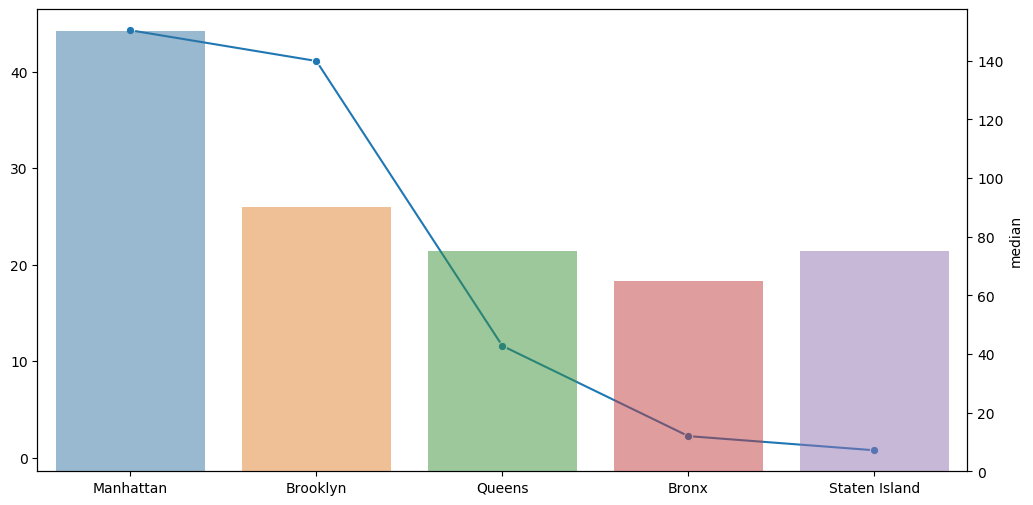

In [46]:
matplotlib.rc_file_defaults()
ax1 = sns.set_style(style=None, rc=None )

fig, ax1 = plt.subplots(figsize=(12,6))

sns.lineplot(data = df_01['percentage'], marker='o', sort = False, ax=ax1)
ax2 = ax1.twinx()

sns.barplot(data = df_01, x='neighbourhood_group', y='median', alpha=0.5, ax=ax2)

### Proportion of each room type and the median price for different room type

In [47]:
room_type_price = airbnb_data_01.groupby(['room_type'])['price'].median().reset_index(name='median')
room_type_price

,room_type,median
0,Entire home/apt,160
1,Private room,70
2,Shared room,45


In [48]:
proportion_room = (airbnb_data_01[['room_type']].value_counts(normalize=True) * 100).reset_index(name='percentage')
proportion_room

,room_type,percentage
0,Entire home/apt,51.966459
1,Private room,45.661111
2,Shared room,2.372431


In [49]:
df_02 = pd.merge(proportion_room, room_type_price, on='room_type')

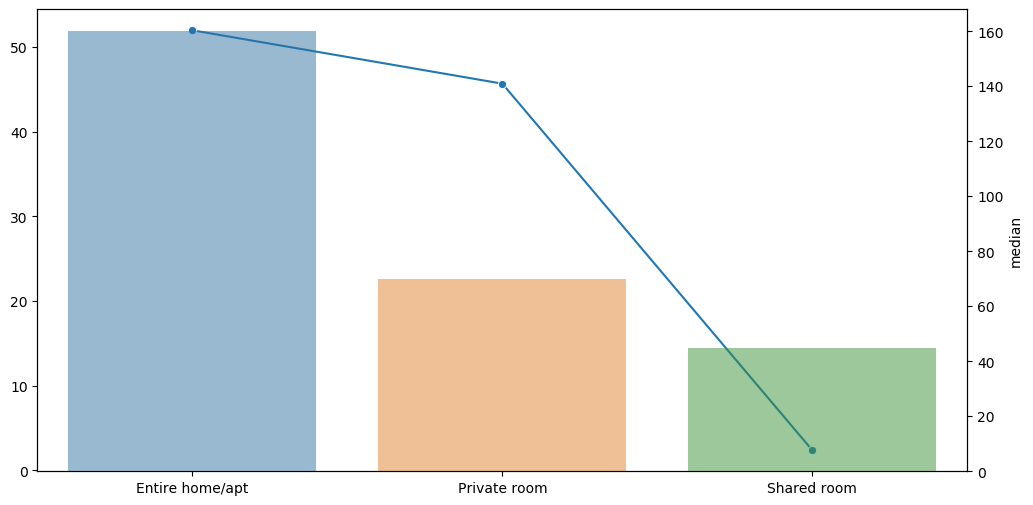

In [50]:
matplotlib.rc_file_defaults()
ax1 = sns.set_style(style=None, rc=None )

fig, ax1 = plt.subplots(figsize=(12,6))

sns.lineplot(data = df_02['percentage'], marker='o', sort = False, ax=ax1)
ax2 = ax1.twinx()

sns.barplot(data = df_02, x='room_type', y='median', alpha=0.5, ax=ax2)

## Conclusion: We can see from the figures above that Manhattan is the most popular neighbourhood for Airbnb listing and people tend to rent out entire home/apartment in NYC.

There is three different category for the room type and the entire home/apartment stand out the most as they represent around 50% of the listing. In regards of the median price for different room types, the entire home/apt is almost double of the other two room type. 

We can also wee a trend of having more listing around the Manhattan areaand the median price for the listing around that area also doubled the price as compared to other neighbourhood area.



What is the distribution of properties according to the number of days of the listing
- Proportion vs median price for the minimum_nights

In [51]:
num_day_price = airbnb_data_01.groupby(['minimum_nights'])['price'].median().reset_index(name='median')
num_day_price

,minimum_nights,median
0,1,90.0
1,2,110.0
2,3,122.0
3,4,125.0
4,5,120.0
...,...,...
104,480,199.0
105,500,75.0
106,999,99.0
107,1000,400.0


In [52]:
proportion_num_night = (airbnb_data_01[['minimum_nights']].value_counts(normalize=True) * 100).reset_index(name='percentage')
proportion_num_night

,minimum_nights,percentage
0,1,26.014930
1,2,23.920646
2,3,16.359546
3,30,7.689948
4,4,6.755292
...,...,...
104,122,0.002045
105,134,0.002045
106,153,0.002045
107,175,0.002045


In [53]:
df_03 = pd.merge(proportion_num_night, num_day_price, on='minimum_nights')

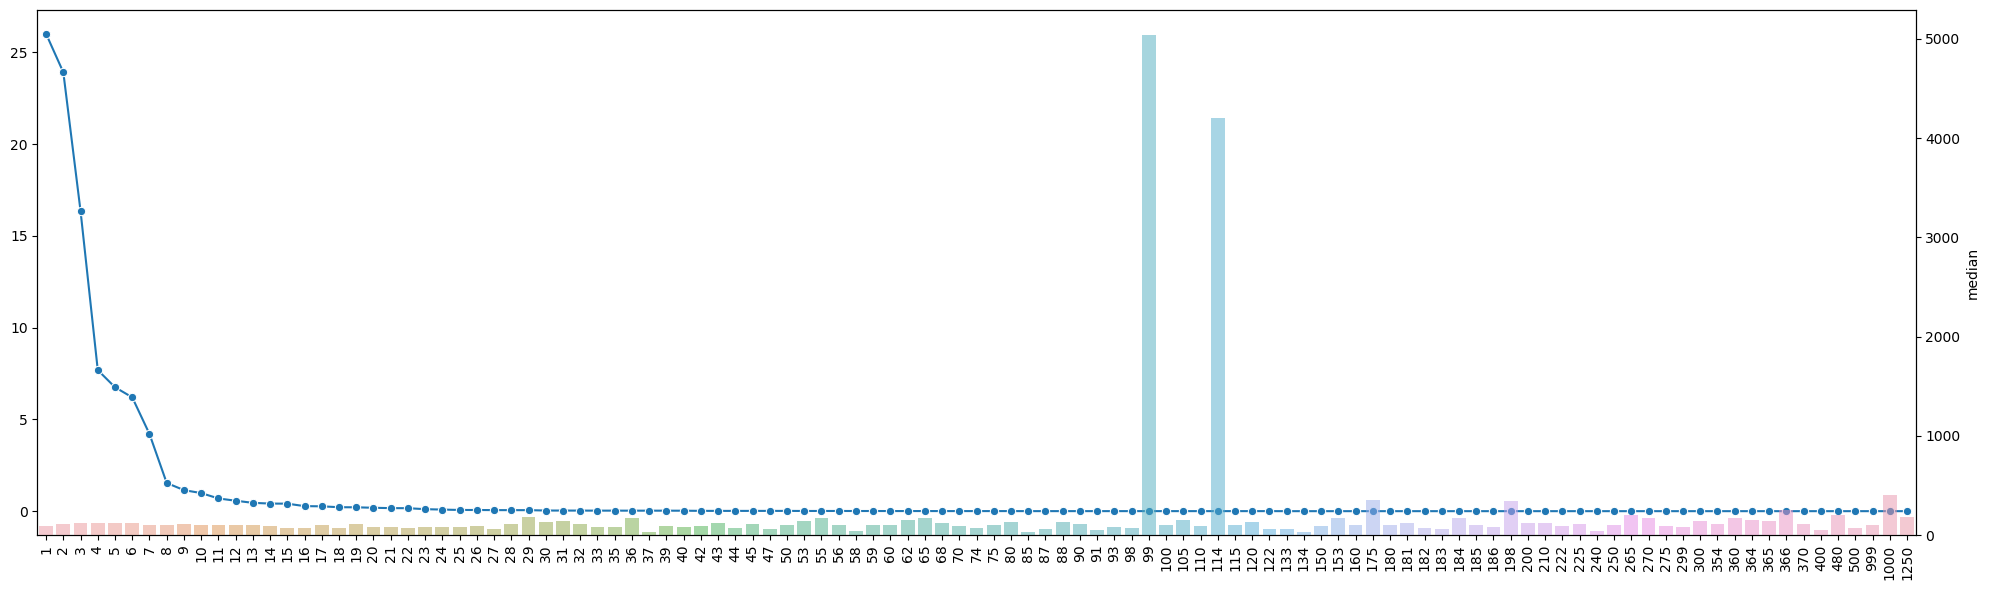

In [54]:
matplotlib.rc_file_defaults()
ax1 = sns.set_style(style=None, rc=None )

fig, ax1 = plt.subplots(figsize=(20,6))

sns.lineplot(data = df_03['percentage'], marker='o', sort = False, ax=ax1)
plt.xticks(rotation=90)
ax2 = ax1.twinx()

sns.barplot(data = df_03, x='minimum_nights', y='median', alpha=0.5, ax=ax2)
plt.xticks(rotation=90)
plt.tight_layout() 
plt.show()

From the graph above, we can conclude that most of the listing on airbnb requires a minimum of one night and the median price on average is less than 1000/night. 

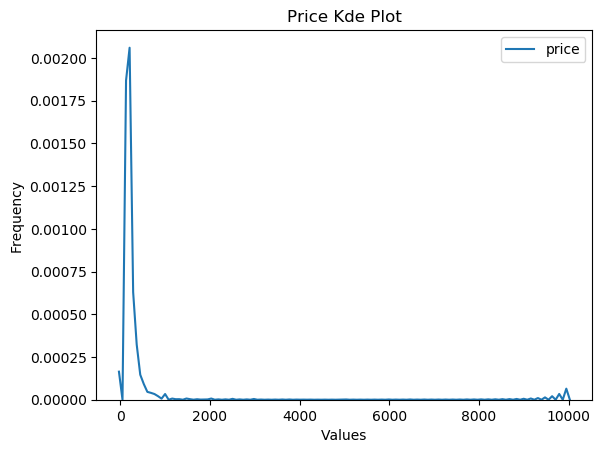

In [128]:
sns.kdeplot(airbnb_data_01['price'])
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Price Kde Plot')
plt.show()


Which neighbourhood in NYC has the highest median price?


In [55]:
median_price_neighbourhood = airbnb_data_01.groupby(by=['neighbourhood_group'],as_index=False)[['price']].median()

In [56]:
median_price_neighbourhood.sort_values(by=['price'])

,neighbourhood_group,price
0,Bronx,65
3,Queens,75
4,Staten Island,75
1,Brooklyn,90
2,Manhattan,150


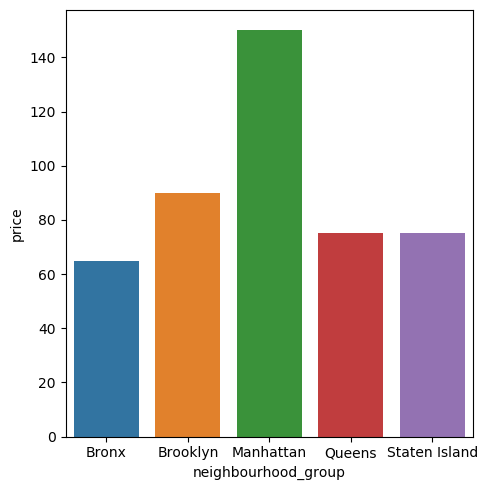

In [57]:
fig = plt.figure(figsize=(5,5))

room_type_data = sns.barplot(data=median_price_neighbourhood, x='neighbourhood_group', y='price')

plt.tight_layout()

<p>The median price as expected Manhattan has the highest and the second is Brooklyn. We also can conclude that on average the median price for neighbourhood group that is not Manhattan will be more then \$60 per night but not more than \$100</p>

Neigbourhood group and Reviews_per_month

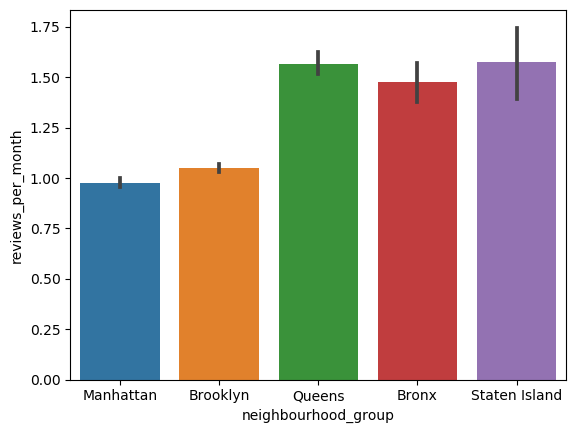

In [131]:
#neighbourhood_group - reviews_per_month
result = airbnb_data_01.groupby(["neighbourhood_group"])['reviews_per_month'].aggregate(np.median).reset_index().sort_values('reviews_per_month')
sns.barplot(x='neighbourhood_group', y="reviews_per_month", data=airbnb_data_01, order=result['neighbourhood_group'])
plt.show()

# Analyze the prices of the listing among different neighbourhood groups.

First, let's see the price distribution for each neighbourhood group

In [58]:
price_analysis = pd.DataFrame()
for each in nyc_neighbourhood:
    tmp_price = airbnb_data_01.loc[airbnb_data_01['neighbourhood_group']==each]['price']
    result = tmp_price.describe(percentiles=[.25, .50, .75])

    result = result.to_frame().rename(columns={'price':each}).T
    
    price_analysis = pd.concat([price_analysis, result])    

price_analysis

,count,mean,std,min,25%,50%,75%,max
Brooklyn,20104.0,124.383207,186.873538,0.0,60.0,90.0,150.0,10000.0
Manhattan,21661.0,196.875814,291.383183,0.0,95.0,150.0,220.0,10000.0
Queens,5666.0,99.517649,167.102155,10.0,50.0,75.0,110.0,10000.0
Staten Island,373.0,114.812332,277.620403,13.0,50.0,75.0,110.0,5000.0
Bronx,1091.0,87.496792,106.709349,0.0,45.0,65.0,99.0,2500.0


In [59]:
airbnb_data_01.groupby(by=['neighbourhood_group'])[['minimum_nights','price','number_of_reviews','reviews_per_month']].mean()

,minimum_nights,price,number_of_reviews,reviews_per_month
neighbourhood_group,,,,
Bronx,4.560953,87.496792,26.004583,1.475655
Brooklyn,6.056556,124.383207,24.202845,1.049790
Manhattan,8.579151,196.875814,20.985596,0.976782
Queens,5.181433,99.517649,27.700318,1.567076
Staten Island,4.831099,114.812332,30.941019,1.576381


From above we can see that on average there is more reviews for Airbnb listing around Staten Island and Bronx.

In [60]:
neighbour_room_group = airbnb_data_01.groupby(by=['neighbourhood_group','room_type'],as_index=False)[['minimum_nights','price','number_of_reviews','reviews_per_month']].median()

In [61]:
neighbour_room_group.sort_values(by=['room_type'])

,neighbourhood_group,room_type,minimum_nights,price,number_of_reviews,reviews_per_month
0,Bronx,Entire home/apt,2.0,100.0,11.0,1.190
3,Brooklyn,Entire home/apt,3.0,145.0,7.0,0.440
6,Manhattan,Entire home/apt,3.0,191.0,4.0,0.250
9,Queens,Entire home/apt,2.0,120.0,8.0,0.880
12,Staten Island,Entire home/apt,2.0,100.0,15.0,1.255
1,Bronx,Private room,2.0,53.5,9.0,0.775
4,Brooklyn,Private room,2.0,65.0,4.0,0.320
7,Manhattan,Private room,2.0,90.0,5.0,0.380
10,Queens,Private room,2.0,60.0,7.0,0.705
13,Staten Island,Private room,2.0,50.0,12.0,1.000


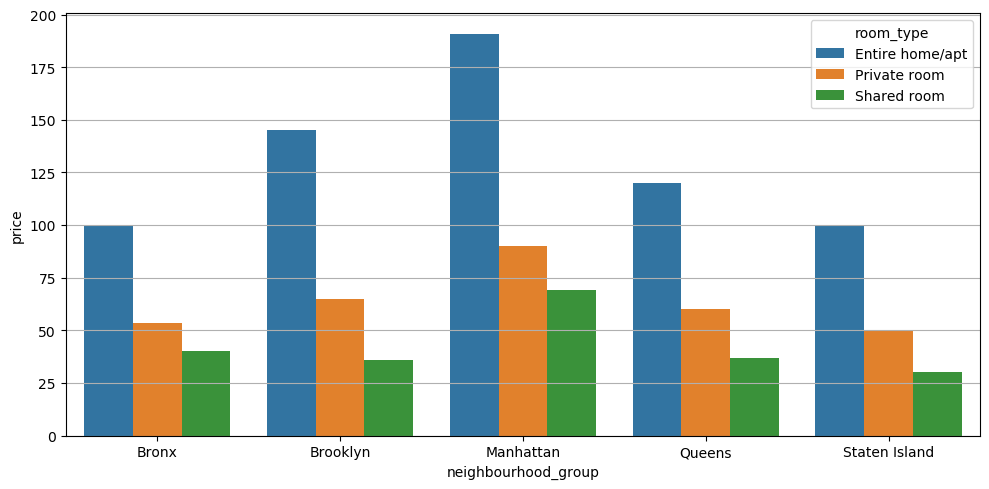

In [62]:
fig = plt.figure(figsize=(10,5))
plt.grid(zorder=0)
room_type_data = sns.barplot(data=neighbour_room_group, x='neighbourhood_group', y='price',
                hue='room_type', ci=None)

plt.tight_layout()

For Entire home/apt, the lowest median price is in the Bronx and Staten Island. These two neighbourhood also has similar median price for the private room as well. However, Staten Island will be the cheapest neighbourhood to stay at three of the room type in NYC. 

##### 

# 2. Crime Rate Dataset

What are the most frequent crimes? between the year in the dataset

In [63]:
crime_data_03.columns

Index(['ARREST_DATE', 'ARREST_BORO', 'LAW_CAT_CD', 'JURISDICTION_CODE',
       'OFNS_DESC', 'PD_DESC'],
      dtype='object')

In [64]:
crime_rate_by_crimes_year = crime_data_03.groupby([crime_data_03['ARREST_DATE']])['LAW_CAT_CD'].value_counts().reset_index(name='value')

In [65]:
crime_rate_by_crimes_year_sorted = crime_rate_by_crimes_year.sort_values('ARREST_DATE')

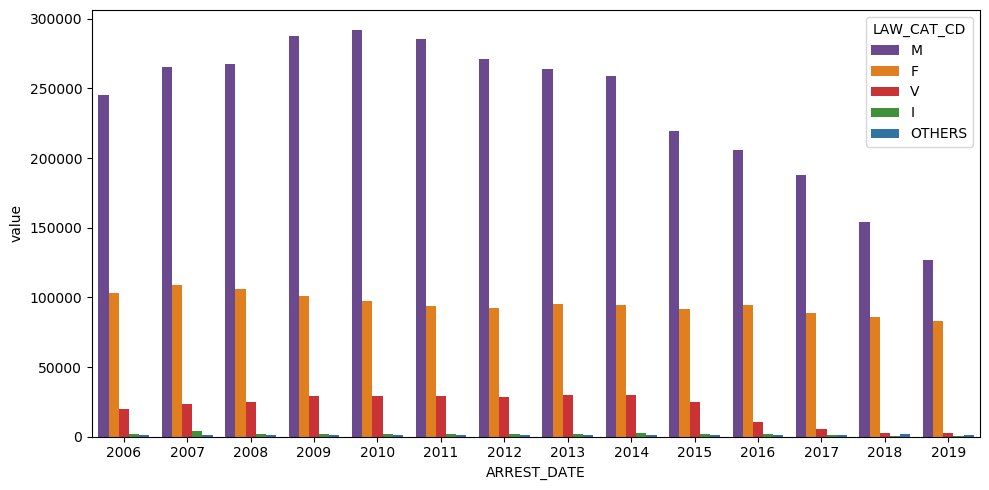

In [66]:
fig = plt.figure(figsize=(10,5))

general_data = sns.barplot(data=crime_rate_by_crimes_year_sorted, x='ARREST_DATE', y='value',
                hue='LAW_CAT_CD', ci=None, palette=("Paired_r"))

plt.tight_layout()

### Category Description
F: Felony

M: Misdemeanor

V: Violation

Others: Person in need of supervision/Unclassified

I: Traffic Infraction

Over the year of 2006-2019, Misdemeanor has been the highest crime in the NYC even though there is a decreasing number for the past few years. As for the seconf highest crime rate - Felony, the number has not changed much over the year. 

In [67]:
crime_rate_by_crimes = crime_data_03[['LAW_CAT_CD']].value_counts().reset_index(name='value')
crime_rate_by_crimes

,LAW_CAT_CD,value
0,M,3331117
1,F,1336955
2,V,292485
3,I,26076
4,OTHERS,17276


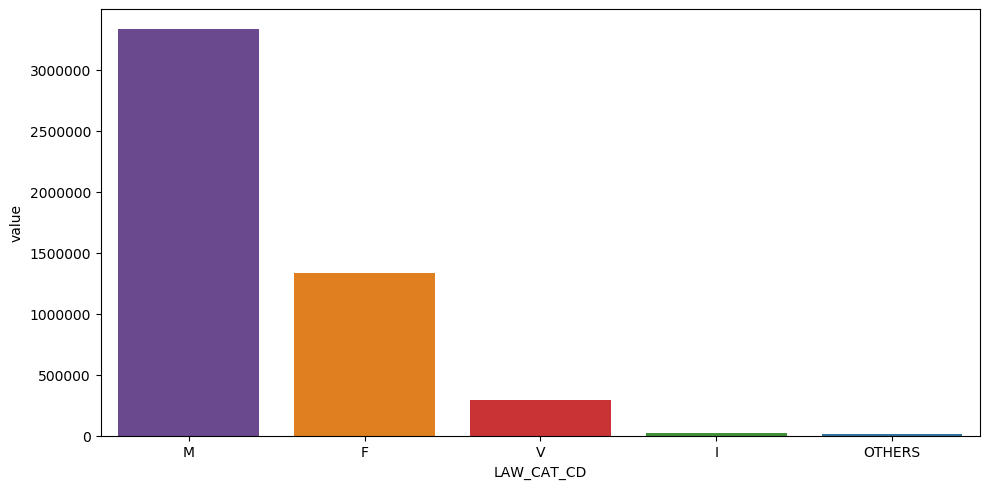

In [68]:
fig = plt.figure(figsize=(10,5))

general_data = sns.barplot(data=crime_rate_by_crimes, x='LAW_CAT_CD', y='value',
                ci=None, palette=("Paired_r"))

plt.tight_layout()

Based on the graph above we can see a huge difference on the crime rates based on the different category. Misdemeanor is the most frequent crimes over the year of 2006-2019; it is about double the crime rate for Felony crimes.

## Most frequent Crimes based on offense Description

In [69]:
crime_data_03.head()

,ARREST_DATE,ARREST_BORO,LAW_CAT_CD,JURISDICTION_CODE,OFNS_DESC,PD_DESC
3,2018,Manhattan,F,Patrol,MISCELLANEOUS PENAL LAW,RECKLESS ENDANGERMENT 1
5,2018,Bronx,F,Patrol,FELONY ASSAULT,"ASSAULT 2,1,UNCLASSIFIED"
10,2018,Bronx,M,Patrol,SEX CRIMES,"SEXUAL ABUSE 3,2"
14,2018,Brooklyn,F,Patrol,FELONY ASSAULT,STRANGULATION 1ST
15,2009,Staten Island,F,Patrol,SEX CRIMES,SODOMY 3


In [70]:
rate_per_offense_desc = crime_data_03[['OFNS_DESC']].value_counts().sort_values(ascending=False).reset_index(name='value').iloc[0:20]
rate_per_offense_desc

,OFNS_DESC,value
0,DANGEROUS DRUGS,1077445
1,ASSAULT 3 & RELATED OFFENSES,491876
2,OTHER OFFENSES RELATED TO THEFT,304190
3,OTHER STATE LAWS,241244
4,PETIT LARCENY,209987
5,VEHICLE AND TRAFFIC LAWS,200292
6,CRIMINAL TRESPASS,199431
7,FELONY ASSAULT,196757
8,DANGEROUS WEAPONS,190846
9,MISCELLANEOUS PENAL LAW,176792


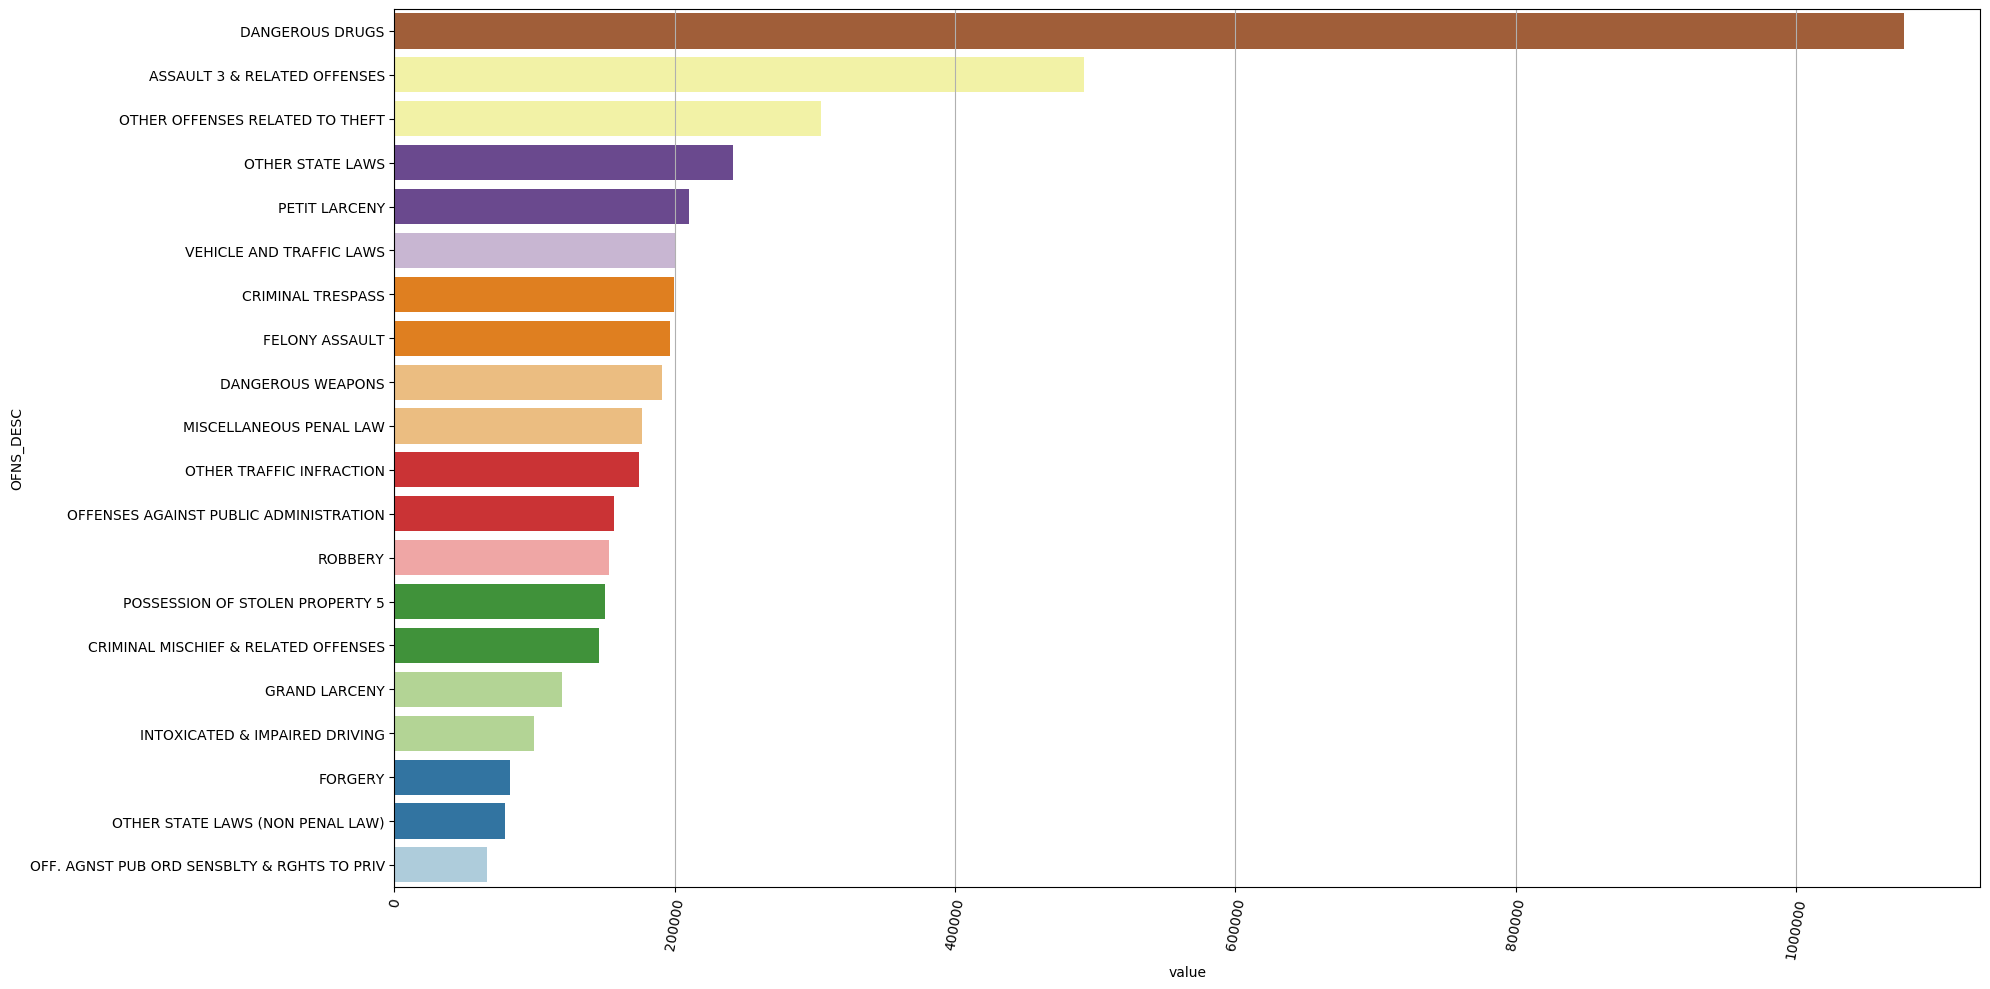

In [71]:
fig = plt.figure(figsize=(20,10))
plt.grid(zorder=0)
sns.barplot(data=rate_per_offense_desc, y='OFNS_DESC', x='value',
                ci=None, palette=("Paired_r"))
plt.xticks(rotation=80)
plt.tight_layout()

The most common crime is not a crime that is classified as a property crime but a drug related crime. Moreover, it can be noted that violent crimes are the top ten crimes in the graph above. It is not surprise that vehicle related crime is within the top 10 of the list.

Types of the crime 
- Use the jurisdiction code to determine what kind of arrest it is 

In [72]:
rate_per_jurisdiction_code = crime_data_03[['JURISDICTION_CODE']].value_counts().sort_values(ascending=False).reset_index(name='value')
rate_per_jurisdiction_code

,JURISDICTION_CODE,value
0,Patrol,4156378
1,Transit,451054
2,Housing,263767
3,Non-NYPD,132710


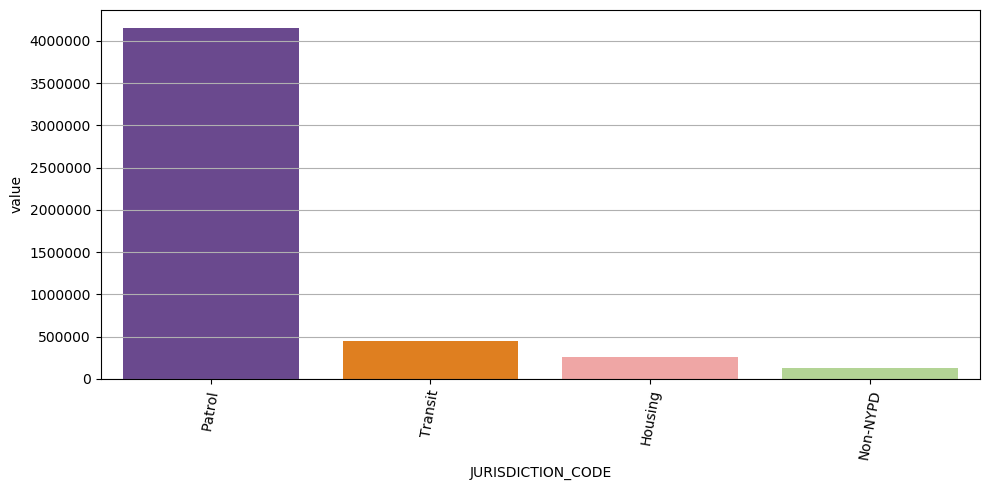

In [73]:
fig = plt.figure(figsize=(10,5))
plt.grid(zorder=0)
sns.barplot(data=rate_per_jurisdiction_code, x='JURISDICTION_CODE', y='value',
                ci=None, palette=("Paired_r"))
plt.xticks(rotation=80)
plt.tight_layout()

We can conclude that there is more crime that is happen on the street as compared to property-related crime.

In [74]:
crime_group_by_code = crime_data_03.groupby([crime_data_03['ARREST_DATE']])['JURISDICTION_CODE'].value_counts().reset_index(name='value')

In [75]:
housing_crime_by_year = crime_group_by_code.loc[crime_group_by_code['JURISDICTION_CODE'] == 'Housing']
housing_crime_by_year.head()

,ARREST_DATE,JURISDICTION_CODE,value
2,2006,Housing,23906
6,2007,Housing,22237
10,2008,Housing,20716
14,2009,Housing,23599
18,2010,Housing,22535


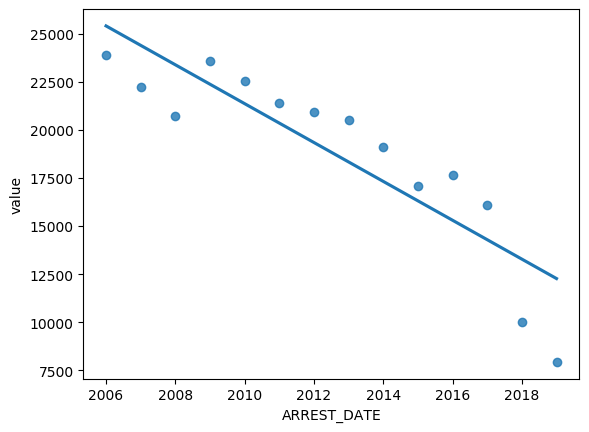

In [76]:
sns.regplot(x='ARREST_DATE', y='value', ci=None, data=housing_crime_by_year)

In [77]:
housing_crime = crime_data_03.loc[crime_data_03['JURISDICTION_CODE'] == 'Housing']

In [78]:
housing_crime_by_year = housing_crime.groupby([housing_crime['ARREST_DATE']])['ARREST_BORO'].value_counts().reset_index(name='value')

In [79]:
housing_crime_by_year = housing_crime_by_year.sort_values('ARREST_DATE')
housing_crime_by_year.head()

,ARREST_DATE,ARREST_BORO,value
0,2006,Manhattan,7901
1,2006,Bronx,7061
2,2006,Brooklyn,6988
3,2006,Queens,1953
4,2006,Staten Island,3


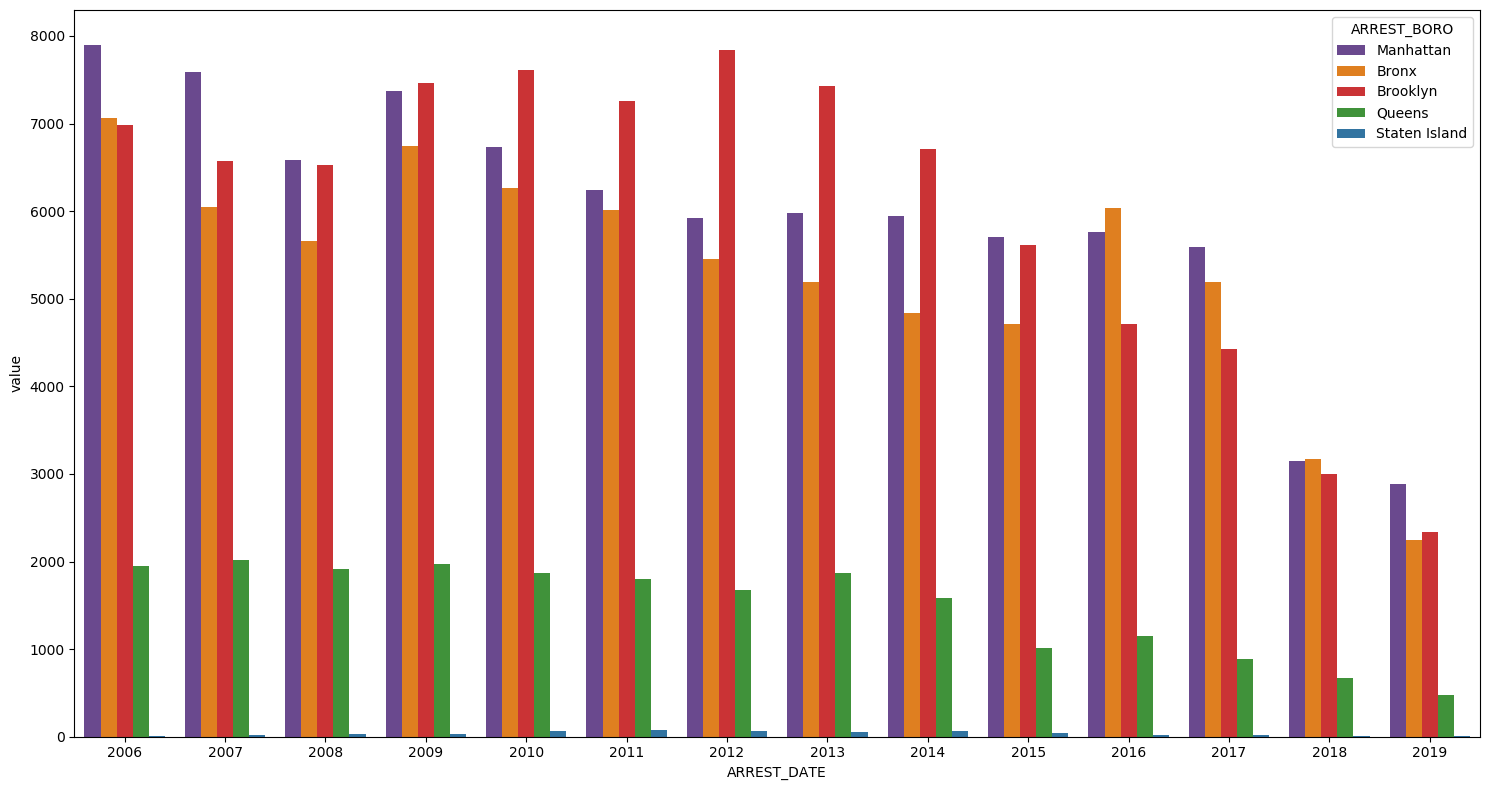

In [80]:
fig = plt.figure(figsize=(15,8))

sns.barplot(data=housing_crime_by_year, x='ARREST_DATE', y='value',
                hue='ARREST_BORO', ci=None, palette=("Paired_r"))

plt.tight_layout()

Staten Island has the least housing related crime over the past year and Queens are the second lowest housing rate. 

### Patrol and Transit Crime Rates

In [81]:
patrol_crime = crime_data_03.loc[crime_data_03['JURISDICTION_CODE'] == 'Patrol']
patrol_crime.head(10)

,ARREST_DATE,ARREST_BORO,LAW_CAT_CD,JURISDICTION_CODE,OFNS_DESC,PD_DESC
3,2018,Manhattan,F,Patrol,MISCELLANEOUS PENAL LAW,RECKLESS ENDANGERMENT 1
5,2018,Bronx,F,Patrol,FELONY ASSAULT,"ASSAULT 2,1,UNCLASSIFIED"
10,2018,Bronx,M,Patrol,SEX CRIMES,"SEXUAL ABUSE 3,2"
14,2018,Brooklyn,F,Patrol,FELONY ASSAULT,STRANGULATION 1ST
15,2009,Staten Island,F,Patrol,SEX CRIMES,SODOMY 3
16,2018,Bronx,M,Patrol,ASSAULT 3 & RELATED OFFENSES,ASSAULT 3
17,2018,Queens,F,Patrol,RAPE,RAPE 3
18,2018,Brooklyn,F,Patrol,RAPE,RAPE 3
19,2018,Brooklyn,F,Patrol,ARSON,"ARSON 2,3,4"
23,2018,Manhattan,F,Patrol,RAPE,RAPE 2


In [82]:
patrol_crime_by_year = patrol_crime.groupby([patrol_crime['ARREST_DATE']])['ARREST_BORO'].value_counts().reset_index(name='value')

In [83]:
patrol_crime_by_year = patrol_crime_by_year.sort_values('ARREST_DATE')

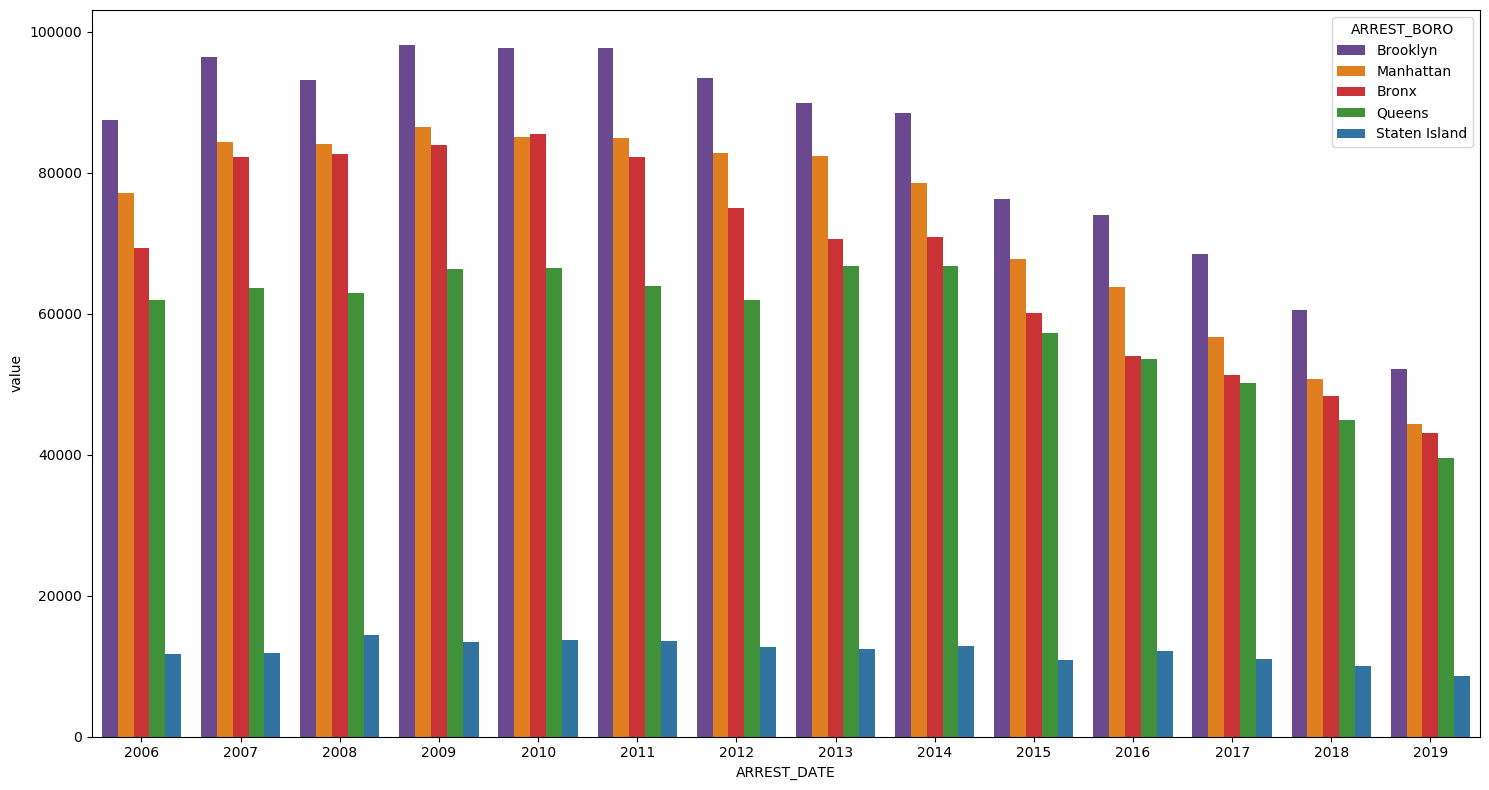

In [84]:
fig = plt.figure(figsize=(15,8))

sns.barplot(data=patrol_crime_by_year, x='ARREST_DATE', y='value',
                hue='ARREST_BORO', ci=None, palette=("Paired_r"))

plt.tight_layout()

In [85]:
transit_crime = crime_data_03.loc[crime_data_03['JURISDICTION_CODE'] == 'Transit']
transit_crime.head()

,ARREST_DATE,ARREST_BORO,LAW_CAT_CD,JURISDICTION_CODE,OFNS_DESC,PD_DESC
46,2018,Manhattan,M,Transit,ASSAULT 3 & RELATED OFFENSES,"MENACING,UNCLASSIFIED"
255,2017,Manhattan,M,Transit,JOSTLING,JOSTLING
273,2017,Manhattan,F,Transit,SEX CRIMES,SEXUAL ABUSE 1
276,2017,Brooklyn,F,Transit,RAPE,RAPE 3
305,2017,Manhattan,F,Transit,SEX CRIMES,SEXUAL ABUSE 1


In [86]:
transit_crime_by_year = transit_crime.groupby([transit_crime['ARREST_DATE']])['ARREST_BORO'].value_counts().reset_index(name='value')

In [87]:
transit_crime_by_year = transit_crime_by_year.sort_values('ARREST_DATE')
transit_crime_by_year.head()

,ARREST_DATE,ARREST_BORO,value
0,2006,Manhattan,12896
1,2006,Brooklyn,6188
2,2006,Bronx,4756
3,2006,Queens,3057
4,2006,Staten Island,45


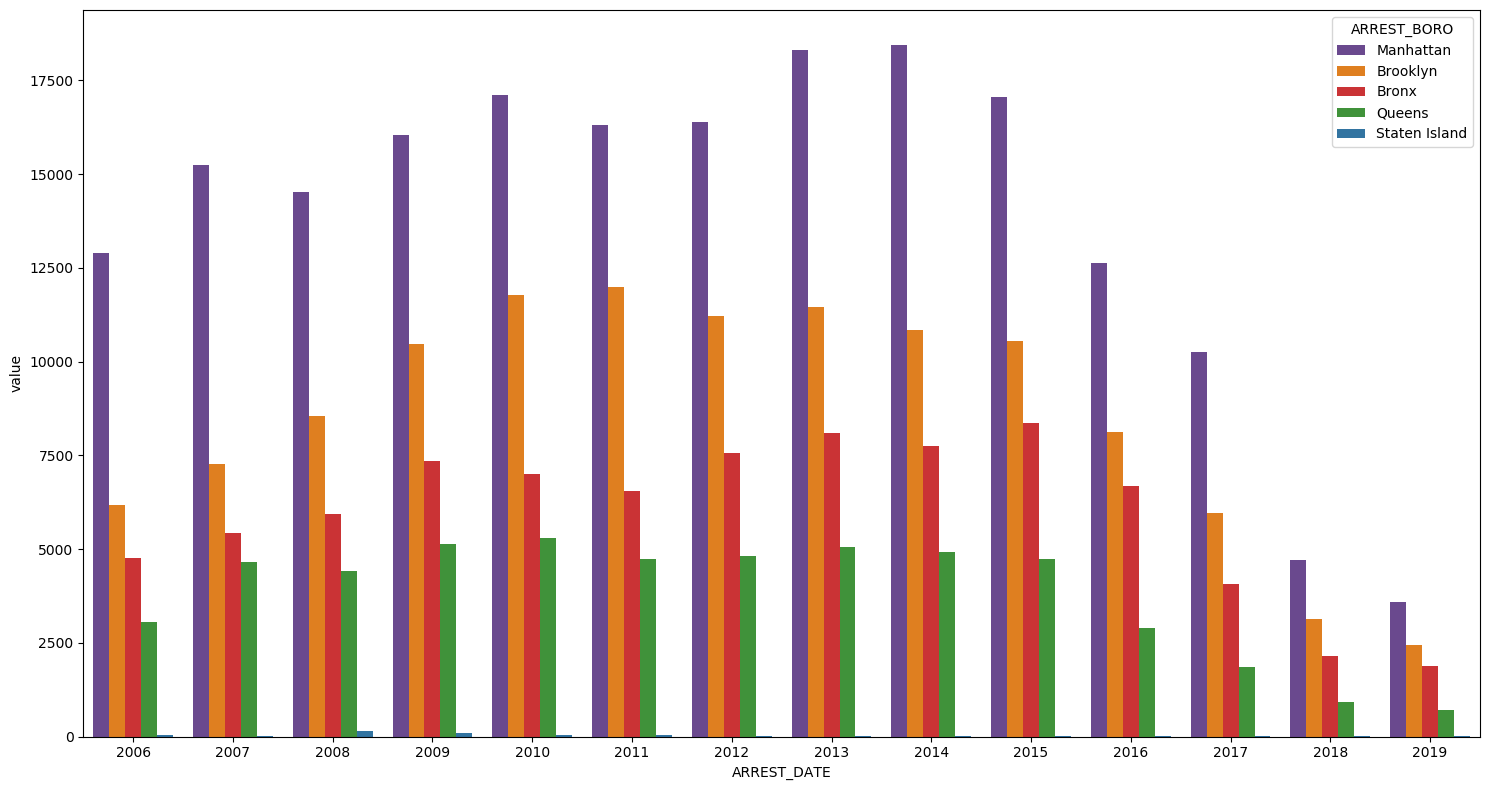

In [88]:
fig = plt.figure(figsize=(15,8))

sns.barplot(data=transit_crime_by_year, x='ARREST_DATE', y='value',
                hue='ARREST_BORO', ci=None, palette=("Paired_r"))

plt.tight_layout()

## Overal crimes in different neighbourhood

In [93]:
num_crime_by_neighbourhood = crime_data_03.groupby(['ARREST_BORO']).size().reset_index(name='value')

In [94]:
num_crime_by_neighbourhood.head()

,ARREST_BORO,value
0,Bronx,1143434
1,Brooklyn,1392123
2,Manhattan,1353703
3,Queens,939332
4,Staten Island,175317


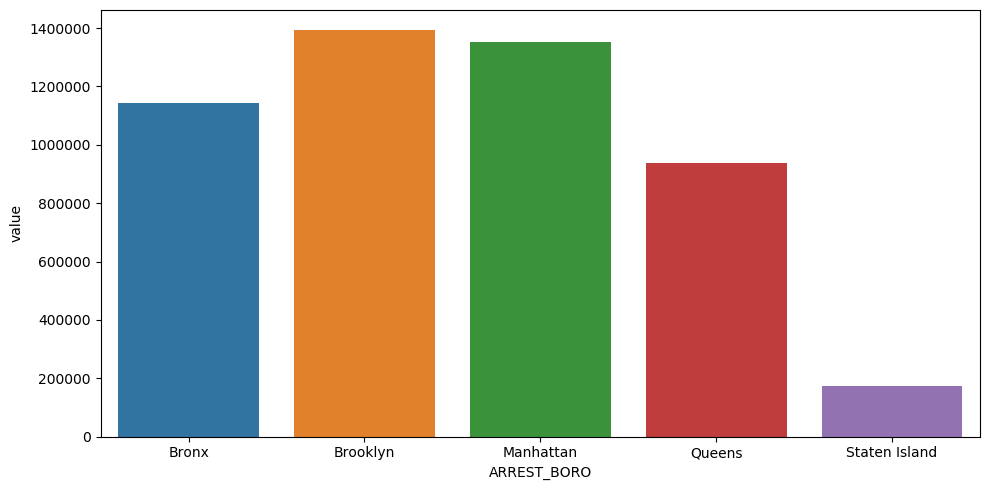

In [97]:
fig = plt.figure(figsize=(10,5))

sns.barplot(data=num_crime_by_neighbourhood, x='ARREST_BORO', y='value')

plt.tight_layout()

In [102]:
type_crime_by_neighbourhood = crime_data_03.groupby(['ARREST_BORO', 'JURISDICTION_CODE']).size().reset_index(name='value')
type_crime_by_neighbourhood

,ARREST_BORO,JURISDICTION_CODE,value
0,Bronx,Housing,74614
1,Bronx,Non-NYPD,26334
2,Bronx,Patrol,958833
3,Bronx,Transit,83653
4,Brooklyn,Housing,84459
5,Brooklyn,Non-NYPD,14309
6,Brooklyn,Patrol,1173361
7,Brooklyn,Transit,119994
8,Manhattan,Housing,83360
9,Manhattan,Non-NYPD,48117


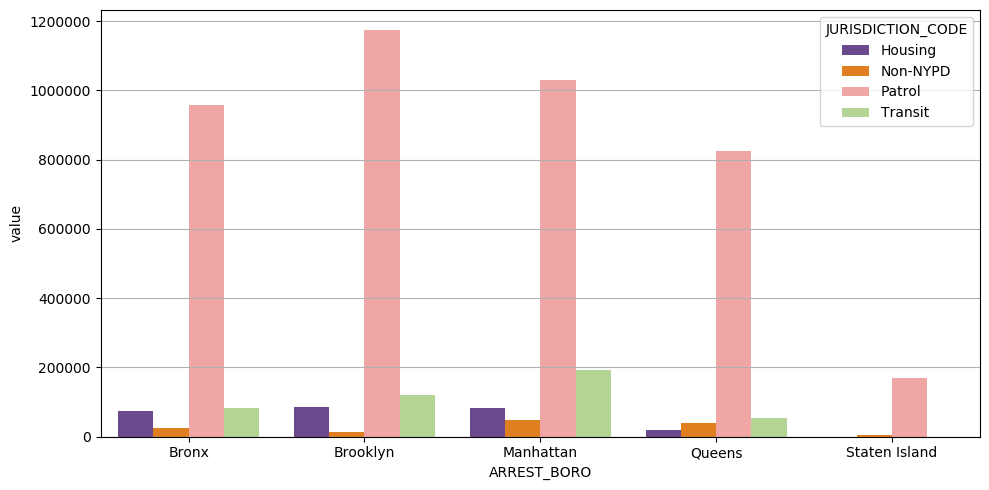

In [101]:
fig = plt.figure(figsize=(10,5))
plt.grid(zorder=0)

sns.barplot(data=type_crime_by_neighbourhood, x='ARREST_BORO', y='value',hue='JURISDICTION_CODE', ci=None, palette=("Paired_r"))

plt.tight_layout()

Based on the two graph above, we can conclude that over the past few years, there is more crimes in Brooklyn than Manhattan and specifically for Patrol related crime, which also can conclude that safety around the Brooklyn is the worst as compared to Manhattan. And we can also see that Patrol related crime is more common as compared to other category. 

## Correlation

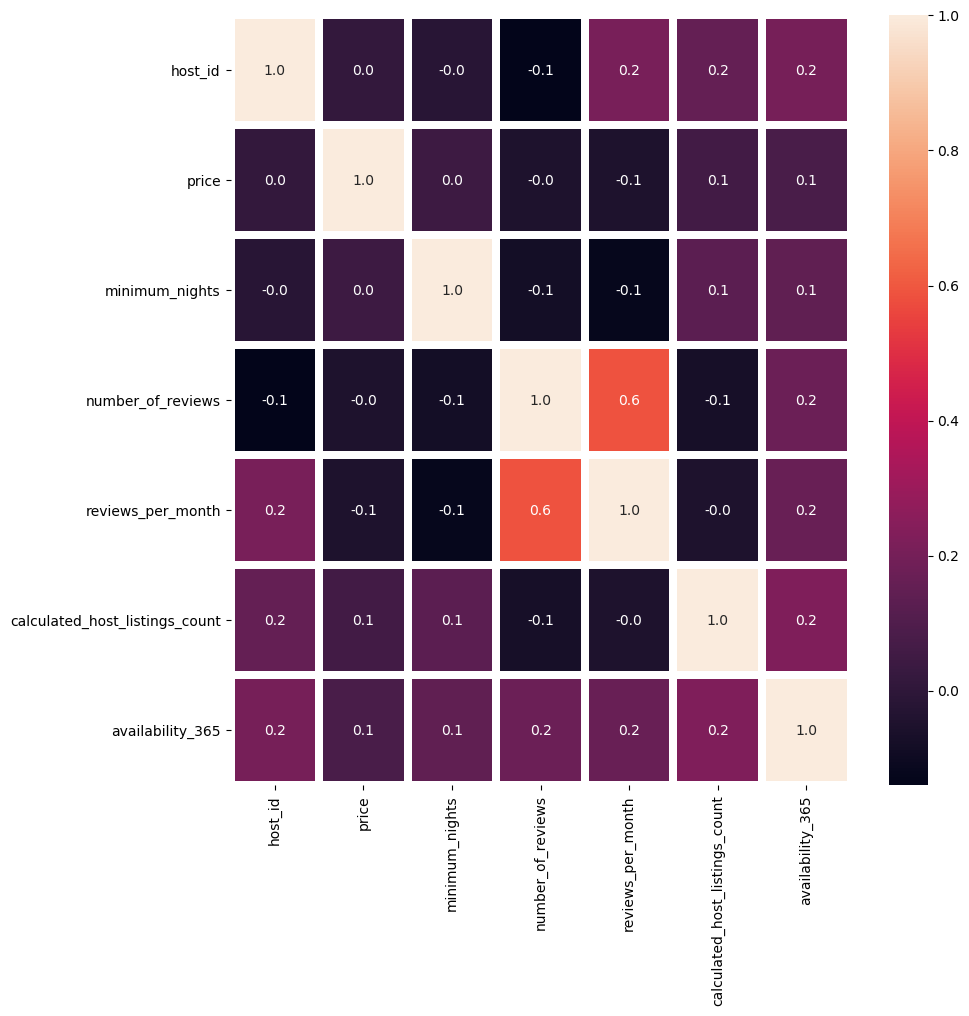

In [127]:
f,ax=plt.subplots(figsize=(10,10))
sns.heatmap(airbnb_data_01.corr(),annot=True,linewidths=5,fmt='.1f',ax=ax)
plt.show()

In [110]:
crime_data_03.head()

,ARREST_DATE,ARREST_BORO,LAW_CAT_CD,JURISDICTION_CODE,OFNS_DESC,PD_DESC
3,2018,Manhattan,F,Patrol,MISCELLANEOUS PENAL LAW,RECKLESS ENDANGERMENT 1
5,2018,Bronx,F,Patrol,FELONY ASSAULT,"ASSAULT 2,1,UNCLASSIFIED"
10,2018,Bronx,M,Patrol,SEX CRIMES,"SEXUAL ABUSE 3,2"
14,2018,Brooklyn,F,Patrol,FELONY ASSAULT,STRANGULATION 1ST
15,2009,Staten Island,F,Patrol,SEX CRIMES,SODOMY 3


In [117]:
year_2018_crime = crime_data_03.loc[crime_data_03['ARREST_DATE'] == 2018]

In [119]:
# F: Felony; M: Misdemeanor; V: Violation; Others: Person in need of supervision/Unclassified; I: Traffic Infraction
law_crime_rate = pd.crosstab(year_2018_crime.ARREST_BORO,[year_2018_crime.JURISDICTION_CODE,year_2018_crime.LAW_CAT_CD], margins=False)
law_crime_rate

JURISDICTION_CODE Housing                     Non-NYPD                        \
LAW_CAT_CD              F  I     M OTHERS   V        F   I     M OTHERS    V   
ARREST_BORO                                                                    
Bronx                 615  0  2550      0   7      478   5  1156      5    9   
Brooklyn              933  1  2011      1  49      446   5  1040      5   24   
Manhattan             729  0  2405      4  11     1001  10  2556     35  118   
Queens                254  0   402      0  11      538   8  2661     10   15   
Staten Island           4  0     9      0   0      118   6   232      1    0   

JURISDICTION_CODE Patrol                          Transit                       
LAW_CAT_CD             F    I      M OTHERS     V       F  I     M OTHERS    V  
ARREST_BORO                                                                     
Bronx              15538   39  32165    359   160     581  0  1556      0   12  
Brooklyn           24934  328  33758    216  1283     662  1  2158      0  325  
Manhattan          17019   75  32489    742   364    1493  0  3088      5  123  
Queens             17284  223  26802    210   411     182  1   669      0   80  
Staten Island       3381   21   6554     57    13       5  0     4      0    0

In [122]:
median_price_df = median_price_neighbourhood.rename({'neighbourhood_group': 'ARREST_BORO'}, axis=1)

In [116]:
crime_data_03[crime_data_03['ARREST_DATE']==2018].groupby(['ARREST_BORO']).size()

ARREST_BORO
Bronx            55235
Brooklyn         68180
Manhattan        62267
Queens           49761
Staten Island    10405
dtype: int64

In [106]:
housing_crime_df = type_crime_by_neighbourhood[type_crime_by_neighbourhood['JURISDICTION_CODE'] == 'Housing']
housing_crime_df

,ARREST_BORO,JURISDICTION_CODE,value
0,Bronx,Housing,74614
4,Brooklyn,Housing,84459
8,Manhattan,Housing,83360
12,Queens,Housing,20840
16,Staten Island,Housing,494


In [125]:
df_merged = pd.merge(median_price_df,housing_crime_df, on='ARREST_BORO')
df_merged

,ARREST_BORO,price,JURISDICTION_CODE,value
0,Bronx,65,Housing,74614
1,Brooklyn,90,Housing,84459
2,Manhattan,150,Housing,83360
3,Queens,75,Housing,20840
4,Staten Island,75,Housing,494
